# Wprowadzenie do analizy czasowych szeregów danych.

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt

file_path = "city_temperature.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sudalairajkumar/daily-temperature-of-major-cities",
  file_path)

print(df.info())
print("----------")
df

/tmp/ipython-input-852849951.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 12.9M/12.9M [00:00<00:00, 73.1MB/s]

Extracting zip of city_temperature.csv...



/usr/local/lib/python3.12/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB
None
----------


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [3]:
# filtrowanie dla miasta Delhi
delhi_df = df[df["City"] == "Delhi"].copy()

print(delhi_df.info())
print(delhi_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 9265 entries, 340321 to 349585
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          9265 non-null   object 
 1   Country         9265 non-null   object 
 2   State           0 non-null      object 
 3   City            9265 non-null   object 
 4   Month           9265 non-null   int64  
 5   Day             9265 non-null   int64  
 6   Year            9265 non-null   int64  
 7   AvgTemperature  9265 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 651.4+ KB
None
       Region Country State   City  Month  Day  Year  AvgTemperature
340321   Asia   India   NaN  Delhi      1    1  1995            50.7
340322   Asia   India   NaN  Delhi      1    2  1995            52.1
340323   Asia   India   NaN  Delhi      1    3  1995            53.8
340324   Asia   India   NaN  Delhi      1    4  1995            53.7
340325   Asia   India   NaN 

In [4]:
# kolumna z data
delhi_df["Date"] = pd.to_datetime(
    delhi_df[["Year", "Month", "Day"]]
)

# data jako indeks
delhi_df.set_index("Date", inplace=True)

# sort chronologiczny
delhi_df.sort_index(inplace=True)

In [5]:
print("Zakres danych:")
print("Od: ", delhi_df.index.min(), "Do: ", delhi_df.index.max())

Zakres danych:
Od:  1995-01-01 00:00:00 Do:  2020-05-12 00:00:00


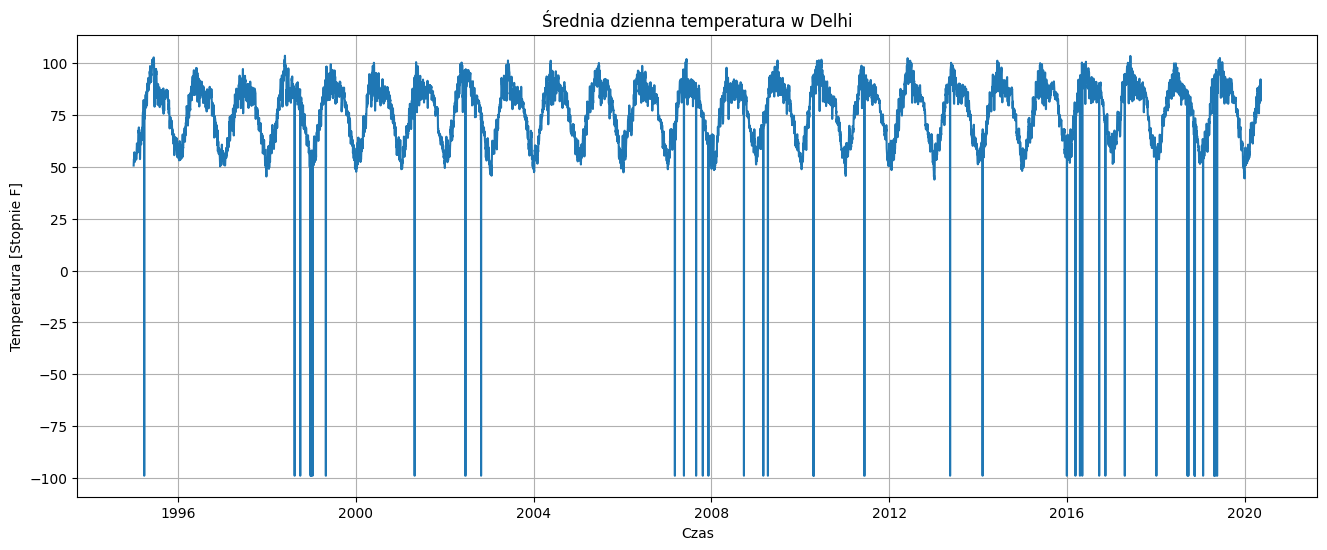

In [8]:
plt.figure(figsize=(16, 6))
plt.plot(delhi_df.index, delhi_df["AvgTemperature"])
plt.title("Średnia dzienna temperatura w Delhi")
plt.xlabel("Czas")
plt.ylabel("Temperatura [Stopnie F]")
plt.grid(True)
plt.show()

In [9]:
# -99 na NaN
delhi_df["AvgTemperature"].replace(-99, pd.NA, inplace=True)

# liczba NaN'ow
print("Liczba braków danych:", delhi_df["AvgTemperature"].isna().sum())

Liczba braków danych: 60


/tmp/ipython-input-3105559718.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  delhi_df["AvgTemperature"].replace(-99, pd.NA, inplace=True)


In [12]:
delhi_df["Temp_month_mean"] = delhi_df.groupby(delhi_df.index.month)["AvgTemperature"]\
                                      .transform(lambda x: x.fillna(x.mean()))

/tmp/ipython-input-1942608429.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda x: x.fillna(x.mean()))


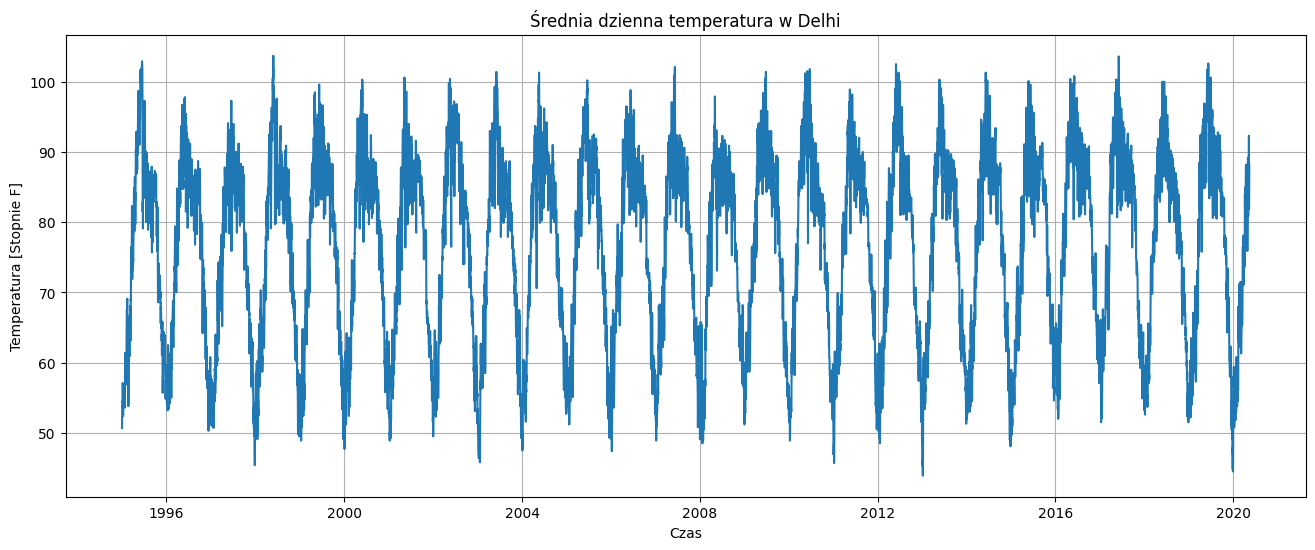

In [24]:
plt.figure(figsize=(16, 6))
plt.plot(delhi_df.index, delhi_df["Temp_month_mean"])
plt.title("Średnia dzienna temperatura w Delhi")
plt.xlabel("Czas")
plt.ylabel("Temperatura [Stopnie F]")
plt.grid(True)
plt.show()

# Analiza autokorelacji (ACF i PACF)

<Figure size 1000x400 with 0 Axes>

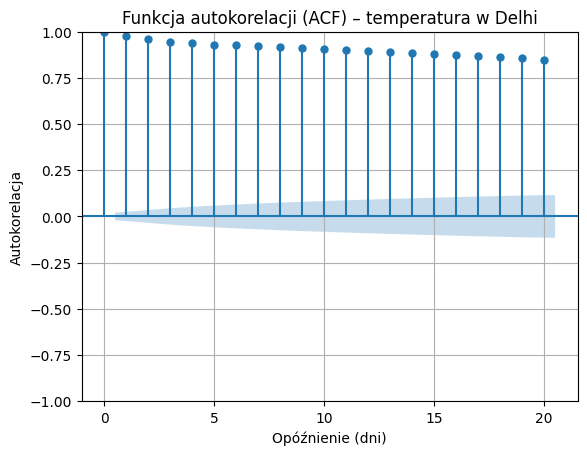

<Figure size 1000x400 with 0 Axes>

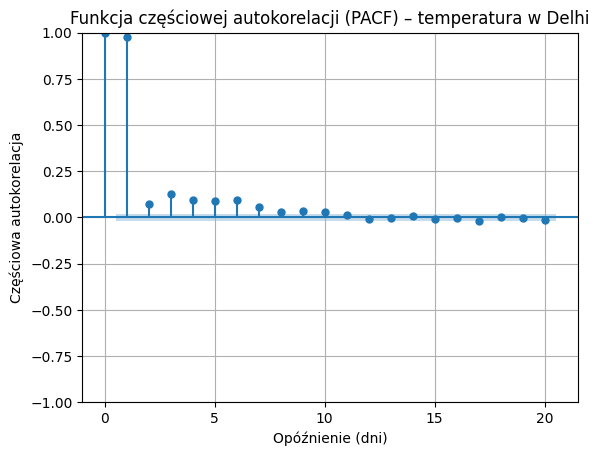

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ts = delhi_df["Temp_month_mean"]
plt.figure(figsize=(10, 4))
plot_acf(ts, lags=20)
plt.title("Funkcja autokorelacji (ACF) – temperatura w Delhi")
plt.xlabel("Opóźnienie (dni)")
plt.ylabel("Autokorelacja")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(ts, lags=20, method="ywm")
plt.title("Funkcja częściowej autokorelacji (PACF) – temperatura w Delhi")
plt.xlabel("Opóźnienie (dni)")
plt.ylabel("Częściowa autokorelacja")
plt.grid(True)
plt.show()

# Dekompozycja szeregu czasowego

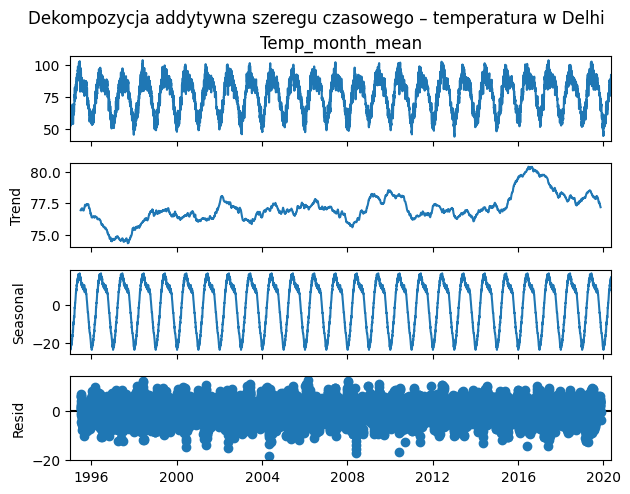

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

# dekompozycja addytywna
decomposition = seasonal_decompose(
    delhi_df["Temp_month_mean"],
    model="additive",
    period=365
)

# wizyalizacja wynikow
decomposition.plot()
plt.suptitle("Dekompozycja addytywna szeregu czasowego – temperatura w Delhi", y=1.02)
plt.show()

# Średnie ruchome

In [38]:
# obliczanie srednich ruchomych
delhi_df["MA_60"] = delhi_df["Temp_month_mean"].rolling(window=60).mean()
delhi_df["MA_180"] = delhi_df["Temp_month_mean"].rolling(window=180).mean()
delhi_df["MA_365"] = delhi_df["Temp_month_mean"].rolling(window=365).mean()

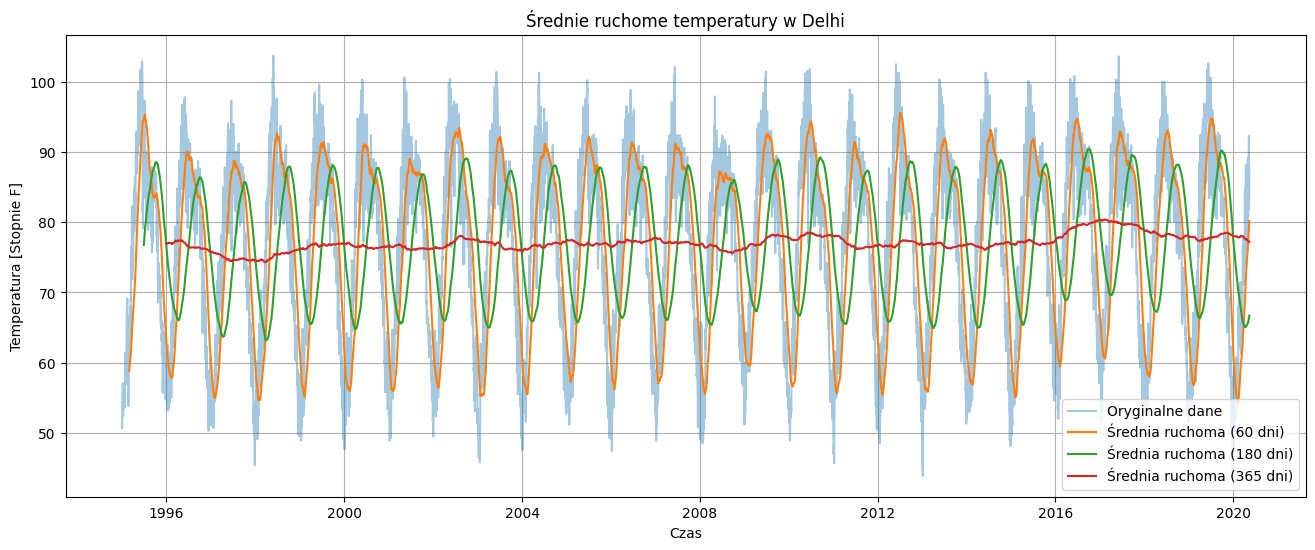

In [39]:
plt.figure(figsize=(16, 6))
plt.plot(delhi_df.index, delhi_df["Temp_month_mean"],
         label="Oryginalne dane", alpha=0.4)

plt.plot(delhi_df.index, delhi_df["MA_60"],
         label="Średnia ruchoma (60 dni)")

plt.plot(delhi_df.index, delhi_df["MA_180"],
         label="Średnia ruchoma (180 dni)")

plt.plot(delhi_df.index, delhi_df["MA_365"],
         label="Średnia ruchoma (365 dni)")

plt.title("Średnie ruchome temperatury w Delhi")
plt.xlabel("Czas")
plt.ylabel("Temperatura [Stopnie F]")
plt.legend()
plt.grid(True)
plt.show()

In [40]:
delhi_df["MA_7"] = delhi_df["Temp_month_mean"].rolling(window=7).mean()
delhi_df["MA_30"] = delhi_df["Temp_month_mean"].rolling(window=30).mean()

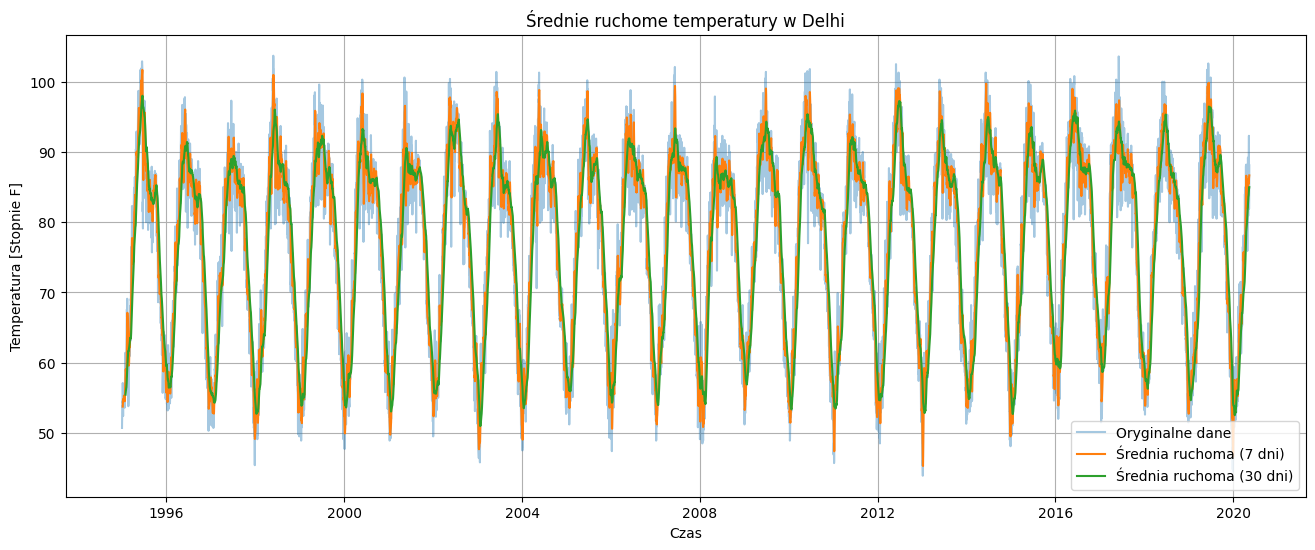

In [41]:
plt.figure(figsize=(16, 6))
plt.plot(delhi_df.index, delhi_df["Temp_month_mean"],
         label="Oryginalne dane", alpha=0.4)

plt.plot(delhi_df.index, delhi_df["MA_7"],
         label="Średnia ruchoma (7 dni)")

plt.plot(delhi_df.index, delhi_df["MA_30"],
         label="Średnia ruchoma (30 dni)")

plt.title("Średnie ruchome temperatury w Delhi")
plt.xlabel("Czas")
plt.ylabel("Temperatura [Stopnie F]")
plt.legend()
plt.grid(True)
plt.show()